In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data=pd.read_csv(r"C:/Users/Playdata/OneDrive/Documents/13주차/월요일 최영진님/titanic.csv")
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(data.shape)
data.columns.values

data.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# x변수 끼리만 모아 둔 것

y_data = data["Survived"]
data.drop(labels="Survived", axis=1, inplace=True)
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#편의를 위해 필요없는 변수들을 제거해준다
drop_columns = ["PassengerId", "Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
data.drop(labels=drop_columns, axis=1, inplace=True)
display(data.head())

,Pclass,Sex,Fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500


In [12]:
data = pd.get_dummies(data, columns=["Sex"])
data.fillna(value=0.0, inplace=True)
display(data.head())

,Pclass,Fare,Sex_female,Sex_male
0,3,7.2500,0,1
1,1,71.2833,1,0
2,3,7.9250,1,0
3,1,53.1000,1,0
4,3,8.0500,0,1


In [22]:
state = 42
test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(data, y_data, 
    test_size=test_size, random_state=state)

In [15]:
# grid_search로 변수찾아보자
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


In [16]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth": [3,5,8],
    "n_estimators": [10,50,100]
}

gb_cv = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1)
gb_cv.fit(X_train, y_train)

print('final params', gb_cv.best_params_)
print('best score', gb_cv.best_score_)

cv_result_df=pd.DataFrame(gb_cv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

final params {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
best score 0.8218838709677421


,params,mean_test_score,rank_test_score
58,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.821884,1
50,"{'learning_rate': 0.15, 'max_depth': 5, 'n_est...",0.818658,2
59,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.818632,3
48,"{'learning_rate': 0.15, 'max_depth': 5, 'n_est...",0.817019,4
35,"{'learning_rate': 0.075, 'max_depth': 8, 'n_es...",0.815471,5
31,"{'learning_rate': 0.075, 'max_depth': 5, 'n_es...",0.815458,6
44,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.813871,7
49,"{'learning_rate': 0.15, 'max_depth': 5, 'n_est...",0.813858,8
13,"{'learning_rate': 0.025, 'max_depth': 5, 'n_es...",0.813832,9
26,"{'learning_rate': 0.05, 'max_depth': 8, 'n_est...",0.812271,10


In [23]:
from sklearn.metrics import classification_report

gb_clf2 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.2, max_depth=5, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



Pclass        0.142637
Sex_female    0.191706
Sex_male      0.208978
Fare          0.456679
dtype: float64


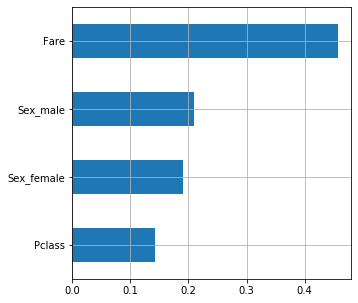

In [27]:
feature_imp = pd.Series(gb_clf2.feature_importances_, index=data.columns).sort_values(ascending=True)
print(feature_imp)
feature_imp.plot(kind='barh', grid=True, figsize=(5,5))
plt.show()


In [28]:
# xgBoosting

from xgboost import plot_importance
from xgboost import XGBClassifier
#import xgboost as xgb

In [32]:
xgg = XGBClassifier()

parameters = {
    "learning_rate" : [0.01, 0.025, 0.075, 0.1, 0.15, 0.2], #많이 쓰는 러닝 레이트, 경사하강법(로스)
    "max_depth" : [3,5,8],
    "n_estimators" : [10,50,100]
}

xgg_cv=GridSearchCV(xgg, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=1)
xgg_cv.fit(X_train, y_train)

print('final param', xgg_cv.best_params_)
print('best score', xgg_cv.best_score_) # 80%설명력을 가지고 있다.

cv_result_df=pd.DataFrame(xgg_cv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

final param {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 100}
best score 0.8074322580645161


,params,mean_test_score,rank_test_score
53,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.807432,1
31,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.807368,2
48,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.805768,3
44,"{'learning_rate': 0.15, 'max_depth': 8, 'n_est...",0.804232,4
14,"{'learning_rate': 0.025, 'max_depth': 5, 'n_es...",0.804168,5
13,"{'learning_rate': 0.025, 'max_depth': 5, 'n_es...",0.804168,5
22,"{'learning_rate': 0.075, 'max_depth': 5, 'n_es...",0.802555,7
37,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.800968,8
41,"{'learning_rate': 0.15, 'max_depth': 5, 'n_est...",0.799381,9
40,"{'learning_rate': 0.15, 'max_depth': 5, 'n_est...",0.799381,9


In [33]:
# confusion matrix: accuracy 가 81%의 정확도를 보여주고 있다.

xg_clf2 = XGBClassifier(n_estimators = 100, learning_rate=0.2, max_depth=8, random_state=0)
X_train = pd.DataFrame(X_train, columns=data.columns)
X_test = pd.DataFrame(X_test, columns=data.columns)
#print(X_train)

xg_clf2.fit(X_train, y_train)
predictions = xg_clf2.predict(X_test)
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [34]:
fscore = xg_clf2.get_booster().get_fscore()
score_f = sorted(fscore.items(), key=(lambda x:x[1]), reverse=True)
print(score_f)

[('Fare', 1650), ('Sex_female', 90), ('Pclass', 90)]


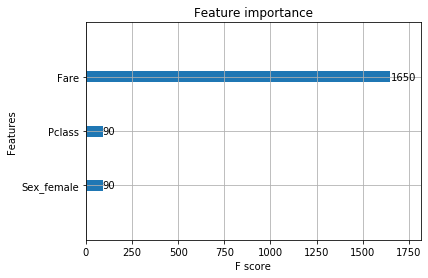

In [35]:
import matplotlib.pyplot as plt
plot_importance(xg_clf2)
plt.show()

In [36]:
from lightgbm import LGBMClassifier, plot_importance

In [38]:
lb = LGBMClassifier()

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth": [1,2,3,4],
    "n_estimators": [10,50,100]
}
# max_depth는 num_leaves에 영향을 받아서 변수 설정이 중요
# num_leaves = default가 "31"
# (max_depth 제곱) -1 <= 31

lgb_cv=GridSearchCV(lb, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=1)
lgb_cv.fit(X_train, y_train)

print('final params', lgb_cv.best_params_)
print('best score', lgb_cv.best_score_)

cv_result_df=pd.DataFrame(lgb_cv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

final params {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 10}
best score 0.8234709677419355


,params,mean_test_score,rank_test_score
69,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.823471,1
81,"{'learning_rate': 0.2, 'max_depth': 4, 'n_esti...",0.821858,2
22,"{'learning_rate': 0.025, 'max_depth': 4, 'n_es...",0.821858,2
57,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.818658,4
11,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.818658,4
43,"{'learning_rate': 0.075, 'max_depth': 3, 'n_es...",0.810632,6
52,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.810619,7
29,"{'learning_rate': 0.05, 'max_depth': 2, 'n_est...",0.810619,7
55,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.810581,9
34,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.807471,10


In [40]:
LG_clf2 = LGBMClassifier(n_estimators=50, learning_rate=0.025, max_depth=4, random_state=0)
X_train = pd.DataFrame(X_train, columns=data.columns)
X_test = pd.DatbaFrame(X_test, columns=data.columns)
#print(X_train)

LG_clf2.fit(X_train, y_train)
predictions = LG_clf2.predict(X_test)
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       157
           1       0.85      0.56      0.67       111

    accuracy                           0.78       268
   macro avg       0.80      0.74      0.75       268
weighted avg       0.79      0.78      0.77       268

